# Pandas Demo

![Pandas Logo](images/pandas_logo.png)

I'm taking this from Brandon Rhodes Pandas tutorial at PyCon 2015.

[https://github.com/brandon-rhodes/pycon-pandas-tutorial](https://github.com/brandon-rhodes/pycon-pandas-tutorial)

It's a really good tutorial, and worth walking through if you want a sense of what you can do with Pandas.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("5JnMutdy6Fw")

In [5]:
from IPython.core.display import HTML
css = open('style_table.css').read()
HTML('<style>{}</style>'.format(css))

In [1]:
import pandas as pd

ImportError: No module named 'pandas'

In [10]:
import seaborn
%matplotlib inline

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Yan Shuangfei,1941
1,El perro del hortelano,2009
2,The First Great Train Robbery,1979
3,Love Me Not,2012
4,180 grados,2009


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


## What are the ten most common movie names of all time?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Temptation              10
Kismet                  10
Paradise                10
The Outsider            10
Hero                    10
Name: title, dtype: int64

## Which three years of the 1930s saw the most films released?

In [8]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

## Plot the number of films that have been released each decade over the history of cinema.

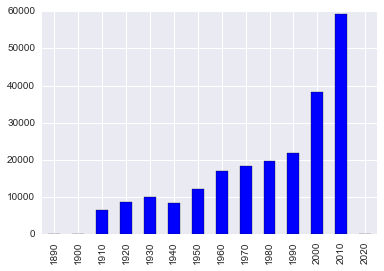

In [11]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

## What are the 11 most common character names in movie history?

In [12]:
cast.character.value_counts().head(11)

Himself        18788
Dancer         11495
Extra           9812
Reporter        7823
Doctor          7091
Policeman       6646
Student         6633
Nurse           6337
Party Guest     6329
Bartender       6306
Minor Role      6091
Name: character, dtype: int64

## Who are the 10 people most often credited as "Herself" in film history?

In [13]:
c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Mary Jo Pehl            7
Margaret Thatcher       7
Lili?n Garc?a           6
Joan Rivers             6
Sally Jessy Raphael     5
Caroline Rhea           5
Kareena Kapoor          5
Hillary Clinton         5
Name: name, dtype: int64

## Who are the 10 people most often credited as "Himself" in film history?

In [14]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Winston Churchill        20
Franklin D. Roosevelt    20
Bill Clinton             20
Benito Mussolini         19
Name: name, dtype: int64

In [ ]:
c = cast
c[c.name.str.contains('Trump')]

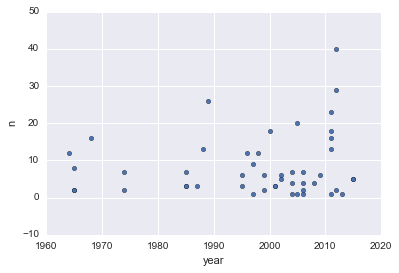

In [16]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench'].sort_values(by='year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [19]:
#List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

In [20]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [21]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
13


In [22]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
23
